# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [1]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

In [ ]:
t = torch.tensor([[1, 2], [3, 4]])
t 


tensor([[1, 2],
        [3, 4]])

In [ ]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [ ]:
t = torch.zeros(8, 8)
t[0] = torch.tensor([-4., -3., -2., -6., -5., -2., -3., -4.])
t[-2] = torch.ones(1, 8)
t[1] = torch.ones(1, 8) * (-1)
t[-1] =  t[0] * (-1)
t

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [ ]:
t = torch.arange(2, 22)
even = t[::2]
odd = t[1::2]

odd * even

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [ ]:
t = torch.arange(1, 111)
t = t.reshape(11, 10)

t[::, :7:]
# t[:, :7]

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [ ]:
# метод repeat
n, m = 4, 5

def repeat_mask(n, m):
  t = torch.tensor([[0, 1], [2, 3]])
  res = t.repeat(n, m)[:n:, :m:]
  return res

In [ ]:
repeat_mask(5, 5)

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

In [ ]:
t = torch.rand(4, 7) * 20
M = t.max()
m = t.min()

a = 1 / (M - m)
b = -m / (M - m)

# aX + b (X = t)
a * t + b

tensor([[0.9380, 0.2879, 0.0000, 0.1547, 0.6629, 0.8379, 0.9416],
        [0.6780, 0.1840, 0.5860, 0.9927, 0.3776, 0.9007, 0.1792],
        [0.8454, 0.8035, 0.8663, 0.1064, 0.4396, 0.8399, 0.5027],
        [0.8582, 0.5491, 0.7898, 1.0000, 0.8642, 0.5222, 0.1037]])

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в тензорах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [ ]:
ar1 = torch.rand(4, 7) * 10
ar2 = torch.rand(4, 7) * 10

torch.manual_seed(0)
print(ar1)
print(ar2)


tensor([[4.3903, 8.8258, 4.0389, 7.0826, 3.4186, 7.5071, 8.8261],
        [3.9280, 5.9655, 9.4241, 8.1483, 6.9353, 8.3172, 2.4879],
        [3.4636, 6.9813, 7.8952, 2.2797, 2.4104, 9.7345, 6.2256],
        [8.4246, 3.2962, 7.8004, 4.5501, 7.7157, 9.5247, 5.9601]])
tensor([[9.0337, 7.7992, 6.2445, 7.5093, 2.6259, 0.8786, 7.8168],
        [9.6087, 4.7074, 9.5322, 8.3045, 6.0108, 6.9517, 5.0849],
        [4.7142, 0.2277, 4.9282, 1.2021, 6.9451, 6.4456, 2.1037],
        [8.0518, 6.0119, 5.8770, 4.7091, 9.1914, 6.6945, 3.5180]])


In [ ]:
ar1 * (ar1 >= ar2)

tensor([[0.0000, 8.8258, 0.0000, 0.0000, 3.4186, 7.5071, 8.8261],
        [0.0000, 5.9655, 0.0000, 0.0000, 6.9353, 8.3172, 0.0000],
        [0.0000, 6.9813, 7.8952, 2.2797, 0.0000, 9.7345, 6.2256],
        [8.4246, 0.0000, 7.8004, 0.0000, 0.0000, 9.5247, 5.9601]])

In [ ]:
ar2 * (ar1 < ar2)

tensor([[9.0337, 0.0000, 6.2445, 7.5093, 0.0000, 0.0000, 0.0000],
        [9.6087, 0.0000, 9.5322, 8.3045, 0.0000, 0.0000, 5.0849],
        [4.7142, 0.0000, 0.0000, 0.0000, 6.9451, 0.0000, 0.0000],
        [0.0000, 6.0119, 0.0000, 4.7091, 9.1914, 0.0000, 0.0000]])

In [ ]:
res = ar1 * (ar1 >= ar2) + ar2 * (ar1 < ar2)

res.sort()

torch.return_types.sort(
values=tensor([[3.4186, 6.2445, 7.5071, 7.5093, 8.8258, 8.8261, 9.0337],
        [5.0849, 5.9655, 6.9353, 8.3045, 8.3172, 9.5322, 9.6087],
        [2.2797, 4.7142, 6.2256, 6.9451, 6.9813, 7.8952, 9.7345],
        [4.7091, 5.9601, 6.0119, 7.8004, 8.4246, 9.1914, 9.5247]]),
indices=tensor([[4, 2, 5, 3, 1, 6, 0],
        [6, 1, 4, 3, 5, 2, 0],
        [3, 0, 6, 4, 1, 2, 5],
        [3, 6, 1, 2, 0, 4, 5]]))

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [ ]:
t = torch.randint(0, 101, (1, 20))
t.sort()[1][0][1]

tensor(18)

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [ ]:
A = torch.zeros(3, 7)
A[1] += 10 
A[2] += 20 
b = torch.tensor([[1, 2, 3, 4, 5, 6, 7]])

A + b

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [11., 12., 13., 14., 15., 16., 17.],
        [21., 22., 23., 24., 25., 26., 27.]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [ ]:
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]]) 
b_1d = torch.tensor([1,2,3])

torch.transpose(a_2d, 0, 1) - b_1d

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
tensor([1, 3, 5, 7])
```

In [ ]:
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])

(a == b).nonzero(as_tuple=True)[0]

tensor([1, 3, 5, 7])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
tensor([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [ ]:
torch.arange(9).view(3,3).flip(dims=(1,0))

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
```

Ожидается результат:

```python
tensor([6, 9, 10])
```

In [ ]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])

a[torch.where((a >= 5) & (a <= 10))]

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `torch.arange(9).reshape(3,3)`

In [ ]:
t = torch.arange(9).reshape(3,3)

# t[:,[1,2]] = t[:,[1,2]].flip([1])

t = t.transpose(0, 1)
t[torch.tensor([0, 2, 1])].transpose(0, 1)

tensor([[0, 2, 1],
        [3, 5, 4],
        [6, 8, 7]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [ ]:
t = torch.randint(0, 10, (8, 10))

s = min(torch.sum(t, 1))
i = int((torch.sum(t, 1) == s).nonzero())

print(i)
print(t[i])

1
tensor([0, 2, 3, 4, 2, 2, 2, 7, 8, 9])


1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [ ]:
t = torch.randint(0, 100, (1, 20))

t[t<30] = t.min()
t[t>70] = t.max()
print(t)

tensor([[ 4, 96, 96,  4, 64, 96,  4, 33, 96, 30,  4, 66, 96, 96, 64, 34, 60, 96,
         34,  4]])


1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [ ]:
t1 = torch.randint(0, 10, (30, 3))
t2 = torch.randint(0, 10, (30, 3))

v = t1[t1 > t2]
v, v.sum()

(tensor([6, 9, 4, 7, 6, 8, 9, 4, 8, 8, 9, 9, 4, 5, 5, 8, 7, 4, 7, 8, 3, 5, 8, 4,
         9, 6, 8, 8, 9, 8, 7, 9, 8, 9, 5, 4, 6]), tensor(251))

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [4]:
t = torch.randint(0, 10, (20,20))
t

tensor([[4, 5, 6, 9, 5, 9, 9, 2, 9, 3, 9, 8, 2, 6, 2, 3, 6, 7, 8, 3],
        [0, 7, 0, 5, 9, 0, 5, 7, 6, 8, 6, 2, 1, 5, 0, 2, 2, 0, 4, 6],
        [6, 4, 3, 0, 6, 0, 2, 9, 6, 5, 7, 5, 6, 3, 7, 3, 1, 1, 1, 8],
        [3, 1, 1, 4, 1, 9, 3, 5, 7, 6, 9, 5, 7, 0, 1, 7, 1, 0, 0, 5],
        [2, 5, 4, 7, 5, 5, 0, 8, 4, 5, 4, 6, 9, 5, 1, 9, 1, 5, 3, 0],
        [6, 3, 0, 8, 0, 3, 1, 4, 4, 0, 2, 7, 4, 6, 1, 5, 5, 8, 7, 8],
        [6, 5, 2, 2, 6, 1, 7, 7, 1, 2, 1, 7, 5, 8, 1, 7, 1, 0, 7, 8],
        [8, 3, 7, 7, 2, 0, 6, 0, 2, 3, 5, 4, 6, 7, 9, 0, 3, 8, 3, 9],
        [9, 3, 6, 9, 7, 4, 2, 2, 0, 8, 2, 8, 7, 3, 9, 3, 8, 9, 4, 5],
        [6, 4, 7, 9, 7, 1, 4, 0, 8, 8, 2, 6, 1, 6, 0, 3, 3, 2, 8, 2],
        [0, 2, 0, 7, 7, 5, 7, 2, 7, 5, 2, 2, 8, 1, 0, 7, 1, 1, 7, 3],
        [4, 4, 1, 6, 3, 5, 2, 8, 4, 4, 7, 2, 3, 6, 4, 9, 2, 6, 7, 8],
        [6, 8, 3, 2, 6, 0, 4, 1, 3, 0, 1, 2, 3, 1, 0, 0, 6, 0, 3, 6],
        [3, 2, 4, 8, 8, 6, 9, 7, 4, 6, 9, 6, 7, 5, 5, 4, 2, 4, 9, 6],
        [7, 2, 5, 7,

In [5]:
torch.diagonal(t, 1)

tensor([5, 0, 0, 1, 5, 1, 7, 2, 8, 2, 2, 3, 1, 5, 8, 8, 5, 2, 3])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [ ]:
ar1 = torch.randint(0, 10, (5, 10))
ar2 = torch.randint(0, 10, (5, 10))

ar1, ar2

(tensor([[9, 8, 9, 8, 7, 7, 1, 0, 1, 1],
         [3, 0, 6, 4, 8, 3, 9, 8, 9, 9],
         [3, 5, 1, 1, 7, 2, 8, 2, 4, 2],
         [6, 3, 8, 7, 1, 8, 2, 1, 8, 1],
         [2, 4, 4, 3, 9, 4, 5, 8, 8, 5]]),
 tensor([[6, 9, 1, 1, 2, 6, 6, 9, 0, 4],
         [9, 3, 4, 8, 7, 6, 2, 7, 0, 5],
         [3, 2, 1, 1, 8, 0, 1, 2, 5, 5],
         [8, 7, 0, 7, 2, 8, 3, 1, 8, 2],
         [6, 0, 8, 5, 7, 7, 5, 6, 4, 5]]))

In [ ]:
ar1.where(ar1!=ar2, ar1*2)

tensor([[ 9,  8,  9,  8,  7,  7,  1,  0,  1,  1],
        [ 3,  0,  6,  4,  8,  3,  9,  8,  9,  9],
        [ 6,  5,  2,  2,  7,  2,  8,  4,  4,  2],
        [ 6,  3,  8, 14,  1, 16,  2,  2, 16,  1],
        [ 2,  4,  4,  3,  9,  4, 10,  8,  8, 10]])

In [ ]:
ar1[ar1==ar2]*2

tensor([ 6,  2,  2,  4, 14, 16,  2, 16, 10, 10])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [ ]:
ar1 = torch.randint(0, 10, (4, 7))
ar2 = torch.randint(0, 10, (4, 7))
ar3 = torch.randint(0, 10, (4, 7))

print(ar1, '\n', ar2, '\n', ar3)

tensor([[7, 3, 4, 6, 5, 1, 6],
        [8, 6, 9, 7, 5, 3, 6],
        [4, 2, 0, 1, 4, 5, 2],
        [5, 3, 8, 8, 5, 4, 0]]) 
 tensor([[0, 9, 9, 9, 5, 5, 9],
        [1, 7, 7, 2, 9, 1, 3],
        [1, 3, 3, 9, 2, 8, 2],
        [5, 6, 5, 3, 5, 3, 5]]) 
 tensor([[7, 0, 8, 1, 0, 9, 5],
        [8, 1, 2, 0, 3, 4, 1],
        [1, 4, 1, 9, 5, 1, 9],
        [8, 3, 1, 9, 6, 6, 5]])


In [ ]:
torch.where((ar1 > ar2) & (ar1 < ar3), 0, ar1)

tensor([[0, 0, 8, 0, 1, 0, 6],
        [1, 0, 3, 8, 6, 5, 4],
        [0, 4, 3, 6, 4, 6, 1],
        [7, 0, 0, 4, 4, 2, 8]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [ ]:
ar1 = torch.randint(0, 20, (20,5))

torch.where((ar1 == ar1.max(dim=1).values.reshape(-1,1)).sum(dim=[0]) >= 5)[0]

tensor([0, 3, 4])

1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [ ]:
ar1 = torch.rand(4,7)

max_ind = ar1.argmax()
row = max_ind // ar1.shape[-1]
col = max_ind % ar1.shape[-1]
ar1[row+1:, col+1:] = 0
ar1

tensor([[0.9803, 0.1458, 0.2788, 0.1039, 0.1914, 0.4218, 0.2584],
        [0.9808, 0.4787, 0.9941, 0.7659, 0.9520, 0.6096, 0.1013],
        [0.3511, 0.8499, 0.8149, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5078, 0.0390, 0.3540, 0.0000, 0.0000, 0.0000, 0.0000]])

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [ ]:
t = torch.tensor([2, 3, 2, 2, 2, 1])

torch.where(torch.arange(1, t.max()+1).repeat(t.shape[0], 1) == t.reshape(-1,1), 1.0, 0.0)

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

In [8]:
T = torch.rand(4, 5)
T.reshape(-1, 1)


tensor([[0.7711],
        [0.2387],
        [0.5783],
        [0.7702],
        [0.7498],
        [0.1551],
        [0.6209],
        [0.4200],
        [0.2297],
        [0.8147],
        [0.0835],
        [0.1857],
        [0.5158],
        [0.8998],
        [0.2283],
        [0.6740],
        [0.0624],
        [0.8189],
        [0.9821],
        [0.2146]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

In [ ]:
arr = torch.randint(0, 100, (20,))
arr

tensor([10, 82, 95, 71, 84, 17, 14, 13, 70, 22, 81, 53, 93, 32, 36, 68, 15, 90,
        44, 37])

In [ ]:
val_c = arr.unique(return_counts=True)
max_c = val_c[1].sort(descending=True)[0][0]
val_max_c = val_c[0][val_c[1] == max_c]
val_max_c

tensor([10, 13, 14, 15, 17, 22, 32, 36, 37, 44, 53, 68, 70, 71, 81, 82, 84, 90,
        93, 95])

In [ ]:
torch.where(torch.isin(arr, val_max_c))

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19]),)

## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [ ]:
n = 8999
arr = torch.linspace(0, 10, n)

((arr * torch.sin(arr)) > 0.5).sum() / n

tensor(0.5241)

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [ ]:
n = 100
a = torch.arange(2, n+1)
p = 2
mask = ~torch.isnan(a)
while 2*p <= (n+1):
    mask = mask & ~torch.isin(a, torch.arange(2*p, n+1, p))
    p = a[mask][a[mask] > p][0]

a[mask]

tensor([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61,
        67, 71, 73, 79, 83, 89, 97])

1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [ ]:
x = torch.randint(0,10, (20,))
y = torch.randint(0,10, (20,))
(((x-y)**2).sum()**(1/2)).item(), torch.dist(x*1.0, y*1.0).item()

(20.074859619140625, 20.074859619140625)

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [ ]:
a = torch.randint(0, 100, (20,3))
a

tensor([[91, 64, 10],
        [55, 40, 17],
        [10, 48, 46],
        [ 1, 20, 93],
        [29, 58, 73],
        [ 6,  3, 49],
        [ 4, 79, 60],
        [26, 56, 66],
        [ 0, 94, 68],
        [47, 35, 89],
        [56,  1, 85],
        [98, 55, 10],
        [91, 26, 44],
        [59, 83, 56],
        [62, 71, 22],
        [13, 83, 94],
        [53, 42, 10],
        [22,  4, 65],
        [81, 87, 82],
        [ 3, 29, 90]])

In [ ]:
a[torch.linalg.norm(a*1.0, dim=1).sort().indices]

tensor([[ 6,  3, 49],
        [10, 48, 46],
        [53, 42, 10],
        [22,  4, 65],
        [55, 40, 17],
        [26, 56, 66],
        [ 3, 29, 90],
        [ 1, 20, 93],
        [62, 71, 22],
        [29, 58, 73],
        [ 4, 79, 60],
        [56,  1, 85],
        [91, 26, 44],
        [47, 35, 89],
        [91, 64, 10],
        [98, 55, 10],
        [ 0, 94, 68],
        [59, 83, 56],
        [13, 83, 94],
        [81, 87, 82]])

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [ ]:
a = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])
a

tensor([1, 3, 7, 1, 2, 6, 0, 1])

In [ ]:
left = a.diff()[:-1]
right = a.flip(0).diff().flip(0)[1:]

indexes = ((((left>0) & (right>0)).nonzero()+1).t()[0])
indexes

tensor([2, 5])

In [ ]:
a[indexes]

tensor([7, 6])

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [ ]:
a = torch.rand(100)
a

tensor([0.6166, 0.5851, 0.3547, 0.4237, 0.8871, 0.5765, 0.3334, 0.8218, 0.1766,
        0.6055, 0.6260, 0.2025, 0.9559, 0.3145, 0.0914, 0.7843, 0.9020, 0.0464,
        0.1591, 0.5532, 0.8695, 0.4524, 0.8155, 0.8511, 0.1147, 0.9742, 0.6345,
        0.1150, 0.6864, 0.0672, 0.4701, 0.0109, 0.8967, 0.6056, 0.6449, 0.4565,
        0.9036, 0.3858, 0.0988, 0.2116, 0.5327, 0.1549, 0.5829, 0.6441, 0.9627,
        0.1678, 0.4828, 0.3074, 0.0809, 0.1590, 0.5267, 0.6771, 0.3682, 0.0977,
        0.3091, 0.4665, 0.7333, 0.9469, 0.7831, 0.4558, 0.4543, 0.6136, 0.7271,
        0.8487, 0.3380, 0.8093, 0.2645, 0.5374, 0.0500, 0.5710, 0.0815, 0.3900,
        0.1146, 0.3786, 0.4332, 0.4915, 0.5822, 0.0691, 0.1677, 0.5313, 0.4885,
        0.9520, 0.2525, 0.0615, 0.1878, 0.6668, 0.3523, 0.2049, 0.7896, 0.7153,
        0.1309, 0.9800, 0.1897, 0.5701, 0.7601, 0.7118, 0.1766, 0.6873, 0.1875,
        0.7102])

In [ ]:
x = torch.rand(1).item()
x

0.8403445482254028

In [ ]:
a[torch.abs(a-x).argmin()]

tensor(0.8487)

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [ ]:
A = torch.tensor([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]).to(torch.float)
B = torch.tensor([[3, -1], [2, 1]]).to(torch.float)
C = torch.tensor([[7, 21], [11, 8], [8, 4]]).to(torch.float)

In [ ]:
(A.inverse() @ ((-1)*C) @ B.inverse()).round()

tensor([[ 1., -0.],
        [-2.,  1.],
        [ 3., -4.]])

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [ ]:
torch.tensor([
    [3,-3,0,7],
    [2,2,4,7],
    [1,2,3,4],
    [5,-4,1,3]
]).to(torch.float).det().round()

tensor(0.)

**`Является`**

1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

In [ ]:
norm = torch.normal(mean=torch.zeros(200), std=10)
norm[:5]

tensor([ 17.1594,  12.8221, -21.1192,   8.0992,  -9.1727])

In [ ]:
bins20 = norm.histc(bins=20)
bins20

tensor([ 3.,  3.,  3.,  9.,  6., 17., 12., 20., 22., 21., 21., 20., 13., 13.,
         5.,  1.,  5.,  3.,  0.,  3.])

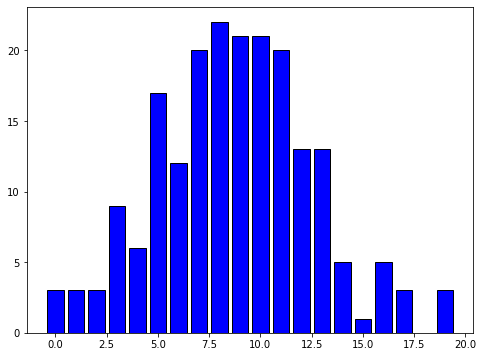

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(
    torch.arange(20),
    bins20,
    color = 'blue',
    edgecolor = 'black'
);